# Multivariate Analysis, Clustering and Decision Trees

## 1) Multivariate Analysis

##### Import the libraries for multivariate analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

##### Reading Multivariate Data into Python

For this portion of the class we will be using the [Python Data Analysis Library](http://pandas.pydata.org) (pandas, imported as `pd`), which you are already familiar with.

Our first data file is from UCI Machine Learning Library,  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data, contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivars. The data set looks like this:

```
1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
...
```

There is one row per wine sample. The first column contains the cultivar of a wine sample (labelled 1, 2 or 3), and the following thirteen columns contain the concentrations of the 13 different chemicals in that sample. The columns are separated by commas, i.e. it is a comma-separated (csv) file without a header row.

The data can be read in a pandas dataframe using the `read_csv()` function. The argument `header=None` tells the function that there is no header in the beginning of the file.<a id='read_data'></a>

In [4]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # independent variables data
y = data.V1  # dependednt variable data
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In this case the data on 178 samples of wine has been read into the variable `data`.

##### Plotting Multivariate Data

Once you have read a multivariate data set into python, the next step is usually to make a plot of the data.

##### A Matrix Scatterplot

One common way of plotting multivariate data is to make a *matrix scatterplot*, showing each pair of variables plotted against each other. We can use the `scatter_matrix()` function from the `pandas.tools.plotting` package to do this.

To use the `scatter_matrix()` function, we need to give it as its input the variables that you want included in the plot. Say for example, that we just want to include the variables corresponding to the concentrations of the first five chemicals. These are stored in columns V2-V6 of the variable `data`. The parameter `diagonal` allows us to specify whether to plot a histogram (`"hist"`) or a Kernel Density Estimation (`"kde"`) for the variable. We can extract just these columns from the variable `data` by typing:

In [5]:
data.loc[:, "V2":"V6"]

,V2,V3,V4,V5,V6
0,14.23,1.71,2.43,15.6,127
1,13.20,1.78,2.14,11.2,100
2,13.16,2.36,2.67,18.6,101
3,14.37,1.95,2.50,16.8,113
4,13.24,2.59,2.87,21.0,118
5,14.20,1.76,2.45,15.2,112
6,14.39,1.87,2.45,14.6,96
7,14.06,2.15,2.61,17.6,121
8,14.83,1.64,2.17,14.0,97
9,13.86,1.35,2.27,16.0,98


To make a matrix scatterplot of just these 5 variables using the `scatter_matrix()` function we type:

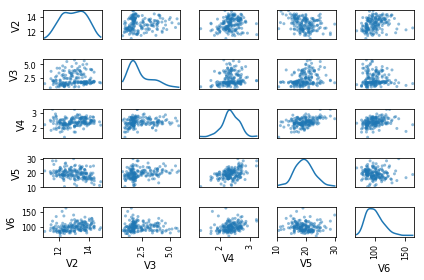

In [6]:
pd.plotting.scatter_matrix(data.loc[:, "V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()

In this matrix scatterplot, the diagonal cells show histograms of each of the variables, in this case the concentrations of the first five chemicals (variables V2, V3, V4, V5, V6).

Each of the off-diagonal cells is a scatterplot of two of the five chemicals, for example, the second cell in the first row is a scatterplot of V2 (y-axis) against V3 (x-axis).

##### A Scatterplot with the Data Points Labelled by their Group

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

For example, in the matrix scatterplot above, the cell in the third column of the fourth row down is a scatterplot of V5 (x-axis) against V4 (y-axis). If you look at this scatterplot, it appears that there may be a positive relationship between V5 and V4.

We may therefore decide to examine the relationship between `V5` and `V4` more closely, by plotting a scatterplot of these two variables, with the data points labelled by their group (their cultivar). To plot a scatterplot of two variables, we can use the `lmplot` function from the `seaborn` package. The V4 and V5 variables are stored in the columns V4 and V5 of the variable `data`. The first two parameters in the `lmplot()` function are the columns to be plotted against each other in x-y, the third parameter specifies the data, the `hue` parameter is the column name used for the labels of the datapoints, i.e. the classes they belong to, lastly, the `fit_reg` parameter is set to `False` when we do not want to plot a regression model relating to the x-y variables. Therefore, to plot the scatterplot, we type:

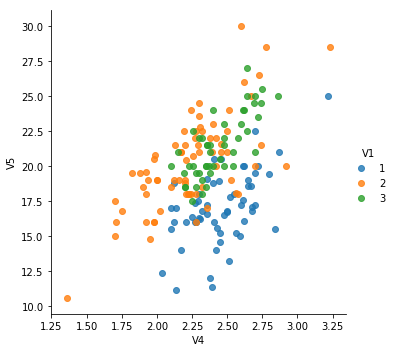

In [9]:
sns.lmplot("V4", "V5", data, hue="V1", fit_reg=False)

We can see from the scatterplot of V4 versus V5 that the wines from cultivar 2 seem to have lower values of V4 compared to the wines of cultivar 1.

##### An overlay plot

Another type of plot that is useful is a *profile plot*, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.


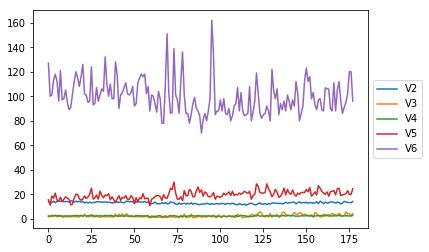

In [10]:
ax = data[["V2","V3","V4","V5","V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is clear from the overlay plot that the mean and standard deviation for V6 is quite a lot higher than that for the other variables.

##### Calculating Summary Statistics for Multivariate Data

We are starting to implement what we learned in the earlier sessions... Another thing that you are likely to want to do is to calculate summary statistics such as the mean and standard deviation for each of the variables in your multivariate data set.

This is easy to do, using the `mean()` and `std()` functions in `numpy` and applying them to the dataframe using its member function `apply`.

<p><div class="alert alert-success">
Pandas allows to do simple operations directly calling them as methods, for example we could do compute the means of a dataframe `df` by calling `df.mean()`.

An alternative option is to use the `apply` method of the `pandas.DataFrame` class, which applies the passed argument function along the input axis of the DataFrame. This method is powerful as it allows passing any function we want to be applied in our data.
</div></p>

For example, say we want to calculate the mean and standard deviations of each of the 13 chemical concentrations in the wine samples. These are stored in columns V2-V14 of the variable `data`, which has been previously assigned to `X` for convenience. So we type:

In [11]:
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

This tells us that the mean of variable V2 is 13.000618, the mean of V3 is 2.336348, and so on.

Similarly, to get the standard deviations of the 13 chemical concentrations, we type:

In [12]:
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

We can see here that it would make sense to standardise in order to compare the variables because the variables have very different standard deviations - the standard deviation of V14 is 314.021657, while the standard deviation of V9 is just 0.124103. Thus, in order to compare the variables, we need to standardise each variable so that it has a sample variance of 1 and sample mean of 0. We will explain below how to standardise the variables.

###### Means and Variances Per Group

It is often interesting to calculate the means and standard deviations for just the samples from a particular group, for example, for the wine samples from each cultivar. The cultivar is stored in the column V1 of the variable `data`, which has been previously assigned to `y` for convenience.

To extract out the data for just cultivar 2, we can type:

In [15]:
cultivar2data = data[y=="2"]
cultivar2data.shape

(71, 14)

We can then calculate the mean and standard deviations of the 13 chemicals' concentrations, for just the cultivar 2 samples:

In [16]:
cultivar2data.loc[:, "V2":].apply(np.mean)

V2      12.278732
V3       1.932676
V4       2.244789
V5      20.238028
V6      94.549296
V7       2.258873
V8       2.080845
V9       0.363662
V10      1.630282
V11      3.086620
V12      1.056282
V13      2.785352
V14    519.507042
dtype: float64

In [17]:
cultivar2data.loc[:, "V2":].apply(np.std)

V2       0.534162
V3       1.008391
V4       0.313238
V5       3.326097
V6      16.635097
V7       0.541507
V8       0.700713
V9       0.123085
V10      0.597813
V11      0.918393
V12      0.201503
V13      0.493064
V14    156.100173
dtype: float64

You can calculate the mean and standard deviation of the 13 chemicals' concentrations for just cultivar 1 samples, or for just cultivar 3 samples, in a similar way.

However, for convenience, you might want to use the function `printMeanAndSdByGroup()` below, which prints out the mean and standard deviation of the variables for each group in your data set:

In [26]:
dat_groupby=X.groupby(y)
display(dat_groupby.apply(np.mean))
display(dat_groupby.apply(np.std))
display(dat_groupby.apply(len))

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805


V1
1    59
2    71
3    48
dtype: int64

In [23]:
# Let's write a simple function to get information about data
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

The arguments of the function are the variables that you want to calculate means and standard deviations for (`X`), and the variable containing the group of each sample (`y`). For example, to calculate the mean and standard deviation for each of the 13 chemical concentrations, for each of the three different wine cultivars, we type:

In [24]:
printMeanAndSdByGroup(X, y)

## Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
V1,
1,59
2,71
3,48


The function `printMeanAndSdByGroup()` also prints out the number of samples in each group. In this case, we see that there are 59 samples of cultivar 1, 71 of cultivar 2, and 48 of cultivar 3.

##### Between-groups Variance and Within-groups Variance for a Variable

If we want to calculate the within-groups variance for a particular variable (for example, for a particular chemical’s concentration), we can use the function `calcWithinGroupsVariance()` below:

In [27]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    withinGroupVariance = numtotal / (denomtotal - numlevels)
    return withinGroupVariance

The `variable` parameter of the function `calcWithinGroupsVariance()` is the input variable for which we wish to compute its within-groups variance for the groups given in `groupvariable`.

So for example, to calculate the within-groups variance of the variable V2 (the concentration of the first chemical), we type:

In [28]:
calcWithinGroupsVariance(X.V2, y)

0.2620524691539065

Thus, the within-groups variance for V2 is 0.2620525.

We can calculate the between-groups variance for a particular variable (eg. V2) using the function `calcBetweenGroupsVariance()` below:

In [29]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    betweenGroupsVariance = numtotal / (numlevels - 1)
    return(betweenGroupsVariance)

Similarly to the parameters of the function `calcWithinGroupsVariance()`, the `variable` parameter of the function `calcBetweenGroupsVariance()` is the input variable for which we wish to compute its between-groups variance for the groups given in `groupvariable`.

So for example, to calculate the between-groups variance of the variable V2 (the concentration of the first chemical), we type:

In [30]:
calcBetweenGroupsVariance(X.V2, y)

35.397424960269106

Thus, the between-groups variance of V2 is 35.397425.

We can calculate the *separation* achieved by a variable as its between-groups variance devided by its within-groups variance. Thus, the separation achieved by V2 is calculated as:

In [31]:
# 35.397424960269106 / 0.2620524691539065
calcBetweenGroupsVariance(X.V2, y) / calcWithinGroupsVariance(X.V2, y)

135.07762424279917

If you want to calculate the separations achieved by all of the variables in a multivariate data set, you can use the function `calcSeparations()` below:

In [32]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        withinGroup = calcWithinGroupsVariance(variablei, groupvariable)
        betweenGroups = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = betweenGroups/withinGroup
        print("variable", variablename, "withinGroup=", withinGroup, "betweenGroups=", betweenGroups, "separation=", sep)

For example, to calculate the separations for each of the 13 chemical concentrations, we type:

In [33]:
calcSeparations(X, y)

variable V2 withinGroup= 0.2620524691539065 betweenGroups= 35.397424960269106 separation= 135.07762424279917
variable V3 withinGroup= 0.8875467967465813 betweenGroups= 32.789018486921364 separation= 36.94342496318368
variable V4 withinGroup= 0.0660721013425184 betweenGroups= 0.8796113572487572 separation= 13.312901199991257
variable V5 withinGroup= 8.006811181211566 betweenGroups= 286.41674636308926 separation= 35.77163740730921
variable V6 withinGroup= 180.65777316441023 betweenGroups= 2245.50102788939 separation= 12.429584338149898
variable V7 withinGroup= 0.1912704752242267 betweenGroups= 17.92835729428464 separation= 93.73300962036717
variable V8 withinGroup= 0.274707514337437 betweenGroups= 64.26119502356416 separation= 233.92587268154927
variable V9 withinGroup= 0.011911702213279677 betweenGroups= 0.32847015746162356 separation= 27.575417146965858
variable V10 withinGroup= 0.2461729437955417 betweenGroups= 7.451995507777756 separation= 30.27138317022764
variable V11 withinGroup= 

Thus, the individual variable which gives the greatest separations between the groups (the wine cultivars) is V8 (separation 233.9). 

As we will discuss below, the purpose of linear discriminant analysis (LDA) is to find the linear combination of the individual variables that will give the greatest separation between the groups (cultivars here). This hopefully will give a better separation than the best separation achievable by any individual variable (233.9 for V8 here).

##### Between-groups Covariance and Within-groups Covariance for Two Variables

If you have a multivariate data set with several variables describing sampling units from different groups, such as the wine samples from different cultivars, it is often of interest to calculate the within-groups covariance and between-groups variance for pairs of the variables.

This can be done using the following functions:

In [34]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    covarianceWithin = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        groupCovariance = term1 # covariance for this group
        covarianceWithin += groupCovariance
    totallength = len(variable1)
    covarianceWithin /= totallength - numlevels
    return covarianceWithin

For example, to calculate the within-groups covariance for variables V8 and V11, we type:

In [35]:
calcWithinGroupsCovariance(X.V8, X.V11, y)

0.28667830215140183

In [36]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    covarianceBetweenGroups = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        covarianceBetweenGroups += term1
    covarianceBetweenGroups /= numlevels - 1
    return covarianceBetweenGroups

For example, to calculate the between-groups covariance for variables V8 and V11, we type:

In [37]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)

-60.4107748359163

Thus, for V8 and V11, the between-groups covariance is -60.41 and the within-groups covariance is 0.29. 

Since the within-groups covariance is positive (0.29), it means V8 and V11 are positively related within groups: for individuals from the same group, individuals with a high value of V8 tend to have a high value of V11, and vice versa. 
    
Since the between-groups covariance is negative (-60.41), V8 and V11 are negatively related between groups: groups with a high mean value of V8 tend to have a low mean value of V11, and vice versa.

##### Calculating Correlations for Multivariate Data

It is often of interest to investigate whether any of the variables in a multivariate data set are significantly correlated.

To calculate the linear (Pearson) correlation coefficient for a pair of variables, you can use the `pearsonr()` function from `scipy.stats` package. For example, to calculate the correlation coefficient for the first two chemicals’ concentrations, V2 and V3, we type:

In [38]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:  ", corr[1])
print("cor:      ", corr[0])

p-value:   0.21008198597074534
cor:       0.094396940910414


This tells us that the correlation coefficient is about 0.094, which is a very weak correlation. Furthermore, the *p-value* for the statistical test of whether the correlation coefficient is significantly different from zero is 0.21. This is much greater than 0.05 (which we can use here as a cutoff for statistical significance), so there is very weak evidence that that the correlation is non-zero.

If you have a lot of variables, you can use the `pandas.DataFrame` method `corr()` to calculate a correlation matrix that shows the correlation coefficient for each pair of variables.

In [39]:
corrmat = X.corr()
corrmat

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V2,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
V3,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
V4,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
V5,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
V6,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
V7,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
V8,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
V9,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
V10,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
V11,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


A better graphical representation of the correlation matrix is via a correlation matrix plot in the form of a *heatmap*.

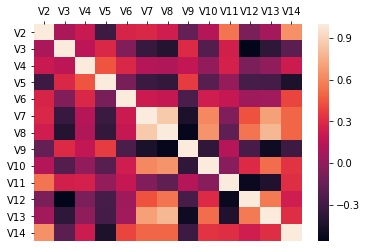

In [40]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

Or an alternative nice visualization is via a Hinton diagram. The color of the boxes determines the sign of the correlation, in this case red for positive and blue for negative correlations; while the size of the boxes determines their magnitude, the bigger the box the higher the magnitude.

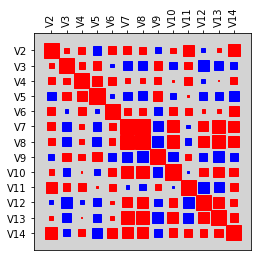

In [41]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

Although the correlation matrix and diagrams are useful for quickly looking to identify the strongest correlations, they still require labor work to find the top `N` strongest correlations. For this you can use the function `mosthighlycorrelated()` below.

The function `mosthighlycorrelated()` will print out the linear correlation coefficients for each pair of variables in your data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

In [42]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

The arguments of the function are the variables that you want to calculate the correlations for, and the number of top correlation coefficients to print out (for example, you can tell it to print out the largest 10 correlation coefficients, or the largest 20).

For example, to calculate correlation coefficients between the concentrations of the 13 chemicals in the wine samples, and to print out the top 10 pairwise correlation coefficients, you can type:

In [43]:
mosthighlycorrelated(X, 10)

,FirstVariable,SecondVariable,Correlation
0,V7,V8,0.864564
1,V8,V13,0.787194
2,V7,V13,0.699949
3,V8,V10,0.652692
4,V2,V14,0.643720
5,V7,V10,0.612413
6,V12,V13,0.565468
7,V3,V12,-0.561296
8,V2,V11,0.546364
9,V8,V12,0.543479


This tells us that the pair of variables with the highest linear correlation coefficient are V7 and V8 (correlation = 0.86 approximately).

##### Standardizing Variables

If you want to compare different variables that have different units, are very different variances, it is a good idea to first standardize these variables.

For example, we found above that the concentrations of the 13 chemicals in the wine samples show a wide range of standard deviations, from 0.124103 for V9 (variance 0.015402) to 314.021657 for V14 (variance 98609.60). This is a range of approximately 6million+-fold in the variances.

As a result, it is not a good idea to use the unstandardised chemical concentrations as the input for a principal component analysis of the wine samples. If you did that, the first principal component would be dominated by the variables which show the largest variances, such as V14.

Thus, it would be a better idea to first standardize the variables so that they all have variance 1 and mean 0, and to then carry out the principal component analysis on the standardized data. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

You can standardise variables by using the `scale()` function from the package `sklearn.preprocessing`.

For example, to standardise the concentrations of the 13 chemicals in the wine samples, we type:

In [45]:
standardizedX = scale(X)

C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [54]:
standardizedX

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [55]:
X.shape

(178, 13)

In [53]:
standardizedX = pd.DataFrame(standardizedX, index=X.index, columns=X.columns)

In [56]:
standardizedX.apply(np.mean)

V2    -8.619821e-16
V3    -8.357859e-17
V4    -8.657245e-16
V5    -1.160121e-16
V6    -1.995907e-17
V7    -2.972030e-16
V8    -4.016762e-16
V9     4.079134e-16
V10   -1.699639e-16
V11   -1.247442e-18
V12    3.717376e-16
V13    2.919013e-16
V14   -7.484650e-18
dtype: float64

In [57]:
standardizedX.apply(np.std)

V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
dtype: float64

### Principal Component Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the case of the wine data set, we have 13 chemical concentrations describing wine samples from three different cultivars. We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 13 chemical concentrations.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the `scale()` function (see above). This is necessary if the input variables have very different variances, which is true in this case as the concentrations of the 13 chemicals have very different variances (see above).

Once you have standardized your variables, you can carry out a principal component analysis using the `PCA` class from `sklearn.decomposition` package and its `fit` method, which fits the model with the data `X`. The default `solver` is Singular Value Decomposition ("svd"). For more information you can type `help(PCA)` in the python console.

For example, to standardize the concentrations of the 13 chemicals in the wine samples, and carry out a principal components analysis on the standardizsed concentrations, we type:

In [67]:
pca = PCA().fit(standardizedX)

In [59]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


You can get a summary of the principal component analysis results using the `pca_summary()` function below:

In [60]:
def pca_summary(pca, standardized_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardized_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    
    if out:
        print("Importance of components:")
        display(summary)
    return summary

The parameters of the `print_pca_summary` function are:
* `pca`: A PCA object
* `standardised_data`: The standardised data
* `out (True)`: Print to standard output

In [61]:
summary = pca_summary(pca, standardizedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.169297,0.361988,0.361988
PC2,1.580182,0.192075,0.554063
PC3,1.202527,0.111236,0.665300
PC4,0.958631,0.070690,0.735990
PC5,0.923704,0.065633,0.801623
PC6,0.801035,0.049358,0.850981
PC7,0.742313,0.042387,0.893368
PC8,0.590337,0.026807,0.920175
PC9,0.537476,0.022222,0.942397


This gives us the standard deviation of each component, and the proportion of variance explained by each component. The standard deviation of the components is stored in a named row called `sdev` of the output variable made by the `pca_summary` function and stored in the `summary` variable:

In [62]:
summary.sdev

,Standard deviation
PC1,2.169297
PC2,1.580182
PC3,1.202527
PC4,0.958631
PC5,0.923704
PC6,0.801035
PC7,0.742313
PC8,0.590337
PC9,0.537476
PC10,0.500902


The total variance explained by the components is the sum of the variances of the components:

In [63]:
np.sum(summary.sdev**2)

Standard deviation    13.0
dtype: float64

In this case, we see that the total variance is 13, which is equal to the number of standardised variables (13 variables). This is because for standardised data, the variance of each standardised variable is 1. The total variance is equal to the sum of the variances of the individual variables, and since the variance of each standardised variable is 1, the total variance should be equal to the number of variables (13 here).

##### Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarize the results of a principal components analysis by making a scree plot, which we can do using the `screeplot()` function below:

In [66]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

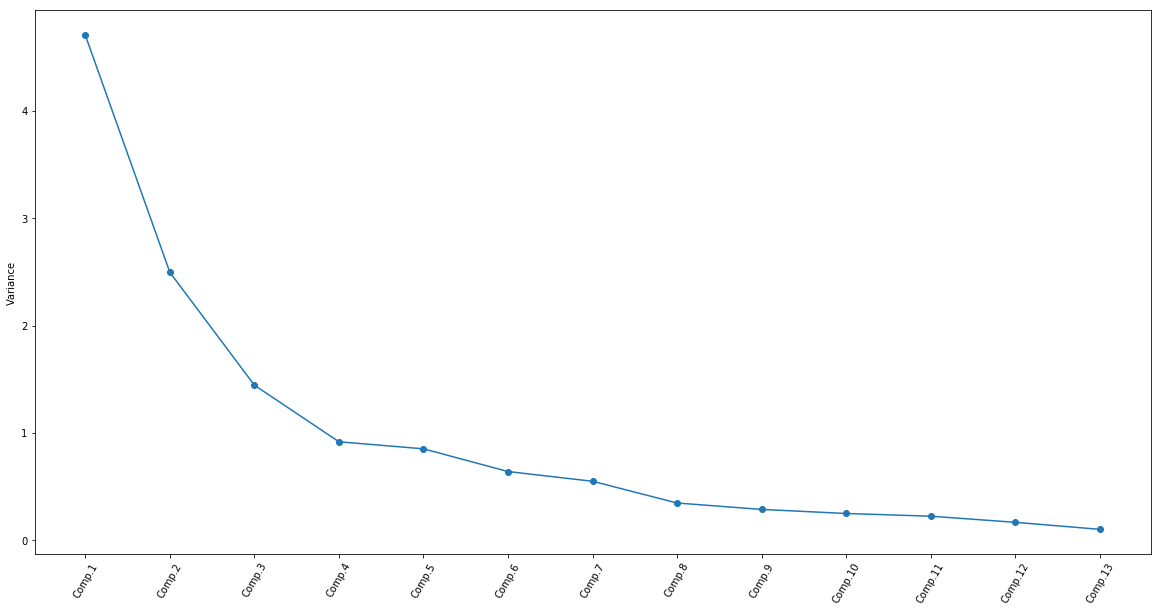

In [69]:
def screeplot(pca, standardized_values):
    y = np.std(pca.transform(standardized_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.figure(figsize=(20,10))
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardizedX)

The most obvious change in slope in the scree plot occurs at component 4, which is the "elbow" of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

Another way of deciding how many components to retain is to use *Kaiser’s criterion*: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [68]:
summary.sdev**2

,Standard deviation
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


We see that the variance is above 1 for principal components 1, 2, and 3 (which have variances 4.71, 2.50, and 1.45, respectively). Therefore, using Kaiser’s criterion, we would retain the first three principal components.

A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. For example, if it is important to explain at least 80% of the variance, we would retain the first five principal components, as we can see from cumulative proportions (`summary.cumprop`) that the first five principal components explain 80.2% of the variance (while the first four components explain just 73.6%, so are not sufficient).

##### Loadings for the Principal Components

The loadings for the principal components are stored in a named element `components_` of the variable returned by `PCA().fit()`. This contains a matrix with the loadings of each principal component, where the first column in the matrix contains the loadings for the first principal component, the second column contains the loadings for the second principal component, and so on.

Therefore, to obtain the loadings for the first principal component in our analysis of the 13 chemical concentrations in wine samples, we type:

In [70]:
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

This means that the first principal component is a linear combination of the variables:
```
-0.144*Z2 + 0.245*Z3 + 0.002*Z4 + 0.239*Z5 - 0.142*Z6 - 0.395*Z7 - 0.423*Z8 + 0.299*Z9 -0.313*Z10 + 0.089*Z11 - 0.297*Z12 - 0.376*Z13 - 0.287*Z14
```

where Z2, Z3, Z4, ..., Z14 are the standardised versions of the variables V2, V3, V4, ..., V14 (that each have mean of 0 and variance of 1).

Note that the square of the loadings sum to 1, as this is a constraint used in calculating the loadings:

In [71]:
np.sum(pca.components_[0]**2)

0.9999999999999993

To calculate the values of the first principal component, we can define our own function to calculate a principal component given the loadings and the input variables' values:

In [72]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

We can then use the function to calculate the values of the first principal component for each sample in our wine data:

In [73]:
calcpc(standardizedX, pca.components_[0])

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

In fact, the values of the first principal component are computed with the following, so we can compare those values to the ones that we calculated, and they should agree:

In [ ]:
pca.transform(standardizedX)[:, 0]

We see that they do agree.

The first principal component has highest (in absolute value) loadings for 
    - V8 (-0.423), 
    - V7 (-0.395), 
    - V13 (-0.376), 
    - V10 (-0.313), 
    - V12 (-0.297), 
    - V14 (-0.287), 
    - V9 (0.299), 
    - V3 (0.245), and 
    - V5 (0.239). 
    
The loadings for V8, V7, V13, V10, V12 and V14 are negative, while those for V9, V3, and V5 are positive. 

Therefore, an interpretation of the first principal component is that it represents a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5.

Similarly, we can obtain the loadings for the second principal component by typing:

In [ ]:
pca.components_[1]

This means that the second principal component is a linear combination of the variables: 

```
0.484*Z2 + 0.225*Z3 + 0.316*Z4 - 0.011*Z5 + 0.300*Z6 + 0.065*Z7 - 0.003*Z8 + 0.029*Z9 + 0.039*Z10 + 0.530*Z11 - 0.279*Z12 - 0.164*Z13 + 0.365*Z14
```

where Z1, Z2, Z3, ..., Z14 are the standardized versions of variables V2, V3, ..., V14 that each have mean 0 and variance 1.

Note again that the square of the loadings sum to 1, as above:

In [ ]:
np.sum(pca.components_[1]**2)

The second principal component has highest loadings for 
    - V11 (0.530), 
    - V2 (0.484), 
    - V14 (0.365), 
    - V4 (0.316), 
    - V6 (0.300), 
    - V12 (-0.279), and 
    - V3 (0.225). 
    
The loadings for V11, V2, V14, V4, V6 and V3 are positive, while the loading for V12 is negative. 

Therefore, an interpretation of the second principal component is that it represents a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12. Note that the loadings for V11 (0.530) and V2 (0.484) are the largest, so the contrast is mainly between the concentrations of V11 and V2, and the concentration of V12.

##### Scatterplots of the Principal Components


The values of the principal components can be computed by the `transform()` (or `fit_transform()`) method of the `PCA` class. It returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

Thus, in our example, `pca.transform(standardizedX)[:, 0]` contains the first principal component, and `pca.transform(standardizedX)[:, 1]` contains the second principal component.

We can make a scatterplot of the first two principal components, and label the data points with the cultivar that the wine samples come from, by typing:

In [ ]:
def pca_scatter(pca, standardized_values, classifications):
    foo = pca.transform(standardized_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifications)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardizedX, y)

The scatterplot shows the first principal component on the x-axis, and the second principal component on the y-axis. We can see from the scatterplot that wine samples of cultivar 1 have much lower values of the first principal component than wine samples of cultivar 3. Therefore, the first principal component separates wine samples of cultivars 1 from those of cultivar 3.

We can also see that wine samples of cultivar 2 have much higher values of the second principal component than wine samples of cultivars 1 and 3. Therefore, the second principal component separates samples of cultivar 2 from samples of cultivars 1 and 3.

Therefore, the first two principal components are reasonably useful for distinguishing wine samples of the three different cultivars.

Above, we interpreted the first principal component as a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5. We can check whether this makes sense in terms of the concentrations of these chemicals in the different cultivars, by printing out the means of the standardized concentration variables in each cultivar, using the `printMeanAndSdByGroup()` function (see above):

In [74]:
printMeanAndSdByGroup(standardizedX, y);

## Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,0.771351,1.174501
2,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,0.245294,-0.724110
3,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578



## Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.565989,0.612825,0.823302,0.758115,0.730892,0.538506,0.395674,0.559639,0.715905,0.531210,0.506699,0.500058,0.699428
2,0.659832,0.905196,1.144991,0.998777,1.168006,0.867674,0.703493,0.991797,1.047418,0.397269,0.884060,0.696425,0.497100
3,0.648130,0.966347,0.668036,0.670991,0.756649,0.565996,0.291583,0.989818,0.708814,0.989176,0.496834,0.380317,0.362688



## Sample sizes:


,0
V1,
1,59
2,71
3,48


Does it make sense that the first principal component can separate cultivar 1 from cultivar 3? 
    * In cultivar 1, the mean values of V8 (0.954), V7 (0.871), V13 (0.769), V10 (0.539), V12 (0.458) and V14 (1.171) are very high compared to the mean values of V9 (-0.577), V3 (-0.292) and V5 (-0.736). 
    * In cultivar 3, the mean values of V8 (-1.249), V7 (-0.985), V13 (-1.307), V10 (-0.764), V12 (-1.202) and V14 (-0.372) are very low compared to the mean values of V9 (0.688), V3 (0.893) and V5 (0.575). 

Therefore, it does make sense that principal component 1 is a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5; and that principal component 1 can separate cultivar 1 from cultivar 3.

Above, we intepreted the second principal component as a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12. In the light of the mean values of these variables in the different cultivars, does it make sense that the second principal component can separate cultivar 2 from cultivars 1 and 3? 
    * In cultivar 1, the mean values of V11 (0.203), V2 (0.917), V14 (1.171), V4 (0.325), V6 (0.462) and V3 (-0.292) are not very different from the mean value of V12 (0.458). 
    * In cultivar 3, the mean values of V11 (1.009), V2 (0.189), V14 (-0.372), V4 (0.257), V6 (-0.030) and V3 (0.893) are also not very different from the mean value of V12 (-1.202). In contrast, in cultivar 2, the mean values of V11 (-0.850), V2 (-0.889), V14 (-0.722), V4 (-0.444), V6 (-0.364) and V3 (-0.361) are much less than the mean value of V12 (0.432). 

Therefore, it makes sense that principal component is a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12; and that principal component 2 can separate cultivar 2 from cultivars 1 and 3.

###  Linear Discriminant Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the wine data set, we have 13 chemical concentrations describing wine samples from three cultivars. By carrying out a principal component analysis, we found that most of the variation in the chemical concentrations between the samples can be captured using the first two principal components, where each of the principal components is a particular linear combination of the 13 chemical concentrations.

The purpose of linear discriminant analysis (LDA) is to find the linear combinations of the original variables (the 13 chemical concentrations here) that gives the best possible separation between the groups (wine cultivars here) in our data set. *Linear discriminant analysis* is also known as *canonical discriminant analysis*, or simply *discriminant analysis*.

If we want to separate the wines by cultivar, the wines come from three different cultivars, so the number of groups (G) is 3, and the number of variables is 13 (13 chemicals’ concentrations; p = 13). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of G-1 and p, and so in this case it is the minimum of 2 and 13, which is 2. Thus, we can find at most 2 useful discriminant functions to separate the wines by cultivar, using the 13 chemical concentration variables.

You can carry out a linear discriminant analysis by using the `LinearDiscriminantAnalysis` class model from the module `sklearn.discriminant_analysis` and using its method `fit()` to fit our `X, y` data.

For example, to carry out a linear discriminant analysis using the 13 chemical concentrations in the wine samples, we type:

In [75]:
lda = LinearDiscriminantAnalysis().fit(X, y)

#### Loadings for the Discriminant Functions

The values of the loadings of the discriminant functions for the wine data are stored in the `scalings_` member of the `lda` object model. For a pretty print we can type:

In [76]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2
V2,-0.403400,0.871793
V3,0.165255,0.305380
V4,-0.369075,2.345850
V5,0.154798,-0.146381
V6,-0.002163,-0.000463
V7,0.618052,-0.032213
V8,-1.661191,-0.491998
V9,-1.495818,-1.630954
V10,0.134093,-0.307088
V11,0.355056,0.253231


This means that the first discriminant function is a linear combination of the variables:
```
-0.403*V2 + 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14
```
where V2, V3, ..., V14 are the concentrations of the 14 chemicals found in the wine samples. For convenience, the value for each discriminant function (eg. the first discriminant function) are scaled so that their mean value is zero (see below).

Note that these loadings are calculated so that the within-group variance of each discriminant function for each group (cultivar) is equal to 1.

As mentioned above, these scalings are stored in the named member `scalings_` of the object variable returned by `LinearDiscriminantAnalysis().fit(X, y)`. This element contains a numpy array, in which the first column contains the loadings for the first discriminant function, the second column contains the loadings for the second discriminant function and so on. For example, to extract the loadings for the first discriminant function, we can type:

In [77]:
lda.scalings_[:, 0]

array([-0.40339978,  0.1652546 , -0.36907526,  0.15479789, -0.0021635 ,
        0.61805207, -1.66119123, -1.49581844,  0.13409263,  0.35505571,
       -0.81803607, -1.15755938, -0.00269121])

Or for "prettier" print, use the dataframe variable created above:

In [78]:
pretty_scalings_.LD1

V2    -0.403400
V3     0.165255
V4    -0.369075
V5     0.154798
V6    -0.002163
V7     0.618052
V8    -1.661191
V9    -1.495818
V10    0.134093
V11    0.355056
V12   -0.818036
V13   -1.157559
V14   -0.002691
Name: LD1, dtype: float64

To calculate the values of the first discriminant function, we can define our own function `calclda()`:

In [ ]:
def calculateLDA(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

The function `calculateLDA()` simply calculates the value of a discriminant function for each sample in the data set, for example, for the first disriminant function, for each sample we calculate the value using the equation:

```
-0.403*V2 - 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14
```

Furthermore, the `scale()` command is used within the `calclda()` function in order to standardise the value of a discriminant function (eg. the first discriminant function) so that its mean value (over all the wine samples) is 0.

We can use the function `calculateLDA()` to calculate the values of the first discriminant function for each sample in our wine data:

In [ ]:
calculateLDA(X, lda.scalings_[:, 0])

In fact, the values of the first linear discriminant function can be calculated using the `transform(X)` or `fit_transform(X, y)` methods of the LDA object, so we can compare those to the ones that we calculated, and they should agree:

In [ ]:
# Try either, they produce the same result, use help() for more info
# lda.transform(X)[:, 0]
lda.fit_transform(X, y)[:, 0]

We see that they do agree.

It doesn’t matter whether the input variables for linear discriminant analysis are standardized or not, unlike for principal components analysis in which it is often necessary to standardize the input variables. However, using standardized variables in linear discriminant analysis makes it easier to interpret the loadings in a linear discriminant function.

In linear discriminant analysis, the standardized version of an input variable is defined so that it has mean zero and within-groups variance of 1. Thus, we can calculate the “group-standardised” variable by subtracting the mean from each value of the variable, and dividing by the within-groups standard deviation. To calculate the group-standardized version of a set of variables, we can use the function `groupStandardize()` below:

In [ ]:
def groupStandardize(variables, groupvariable):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupsVariance(variablei, groupvariable)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new
    return variables_new

For example, we can use the `groupStandardize()` function to calculate the group-standardized versions of the chemical concentrations in wine samples:

In [ ]:
groupstandardizedX = groupStandardize(X, y)

We can then use the `LinearDiscriminantAnalysis().fit()` method to perform linear disriminant analysis on the group-standardised variables:

In [ ]:
lda2 = LinearDiscriminantAnalysis().fit(groupstandardizedX, y)
pretty_scalings(lda2, groupstandardizedX)

It makes sense to interpret the loadings calculated using the group-standardized variables rather than the loadings for the original (unstandardized) variables.

In the first discriminant function calculated for the group-standardized variables, the largest loadings (in absolute) value are given to V8 (-0.871), V11 (0.537), V13 (-0.464), V14 (-0.464), and V5 (0.438). The loadings for V8, V13 and V14 are negative, while those for V11 and V5 are positive. Therefore, the discriminant function seems to represent a contrast between the concentrations of V8, V13 and V14, and the concentrations of V11 and V5.

We saw above that the individual variables which gave the greatest separations between the groups were V8 (separation 233.93), V14 (207.92), V13 (189.97), V2 (135.08) and V11 (120.66). These were mostly the same variables that had the largest loadings in the linear discriminant function (loading for V8: -0.871, for V14: -0.464, for V13: -0.464, for V11: 0.537).

We found above that variables V8 and V11 have a negative between-groups covariance (-60.41) and a positive within-groups covariance (0.29). When the between-groups covariance and within-groups covariance for two variables have opposite signs, it indicates that a better separation between groups can be obtained by using a linear combination of those two variables than by using either variable on its own.

Thus, given that the two variables V8 and V11 have between-groups and within-groups covariances of opposite signs, and that these are two of the variables that gave the greatest separations between groups when used individually, it is not surprising that these are the two variables that have the largest loadings in the first discriminant function.

Note that although the loadings for the group-standardized variables are easier to interpret than the loadings for the unstandardized variables, the values of the discriminant function are the same regardless of whether we standardize the input variables or not. For example, for wine data, we can calculate the value of the first discriminant function calculated using the unstandardized and group-standardised variables by typing:

In [ ]:
lda.fit_transform(X, y)[:, 0]

In [ ]:
lda2.fit_transform(groupstandardizedX, y)[:, 0]

We can see that although the loadings are different for the first discriminant functions calculated using unstandardized and group-standardized data, the actual values of the first discriminant function are the same.

##### Separation Achieved by the Discriminant Functions

To calculate the separation achieved by each discriminant function, we first need to calculate the value of each discriminant function, by substituting the values of the variables into the linear combination for the discriminant function (eg. `-0.403*V2 - 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14` for the first discriminant function), and then scaling the values of the discriminant function so that their mean is zero.

As mentioned above, we can do this using the `rpredict()` function which simulates the output of the `predict()` function in R. For example, to calculate the value of the discriminant functions for the wine data, we type:

In [ ]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardizedX, y, True)

The returned variable has a named element `x` which is a matrix containing the linear discriminant functions: the first column of `x` contains the first discriminant function, the second column of `x` contains the second discriminant function, and so on (if there are more discriminant functions).

We can therefore calculate the separations achieved by the two linear discriminant functions for the wine data by using the `calcSeparations()` function (see above), which calculates the separation as the ratio of the between-groups variance to the within-groups variance:

In [ ]:
calcSeparations(lda_values["x"], y)

As mentioned above, the loadings for each discriminant function are calculated in such a way that the within-group variance for each group (wine cultivar here) is equal to 1, as we see in the output from `calcSeparations()` above.

The output from `calcSeparations()` tells us that the separation achieved by the first (best) discriminant function is 794.7, and the separation achieved by the second (second best) discriminant function is 361.2.

Therefore, the total separation is the sum of these, which is (`794.652200566216+361.241041493455=1155.893`) 1155.89, rounded to two decimal places. Therefore, the *percentage separation* achieved by the first discriminant function is (`794.652200566216*100/1155.893=`) 68.75%, and the percentage separation achieved by the second discriminant function is (`361.241041493455*100/1155.893=`) 31.25%.

The *proportion of trace* (as reported in R by the `lda()` model) is the percentage separation achieved by each discriminant function. For example, for the wine data we get the same values as just calculated (68.75% and 31.25%). Note that in `sklearn` the proportion of trace is reported as `explained_variance_ratio_` in a `LinearDiscriminantAnalysis` model and is computed only for an "eigen" solver, while so far we have been using the default one, which is "svd" (Singular Value Decomposition):

In [ ]:
def proportion_of_trace(lda):
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    ret = ret.transpose()
    print("Proportion of trace:")
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y));

Therefore, the first discriminant function does achieve a good separation between the three groups (three cultivars), but the second discriminant function does improve the separation of the groups by quite a large amount, so is it worth using the second discriminant function as well. Therefore, to achieve a good separation of the groups (cultivars), it is necessary to use both of the first two discriminant functions.

We found above that the largest separation achieved for any of the individual variables (individual chemical concentrations) was 233.9 for V8, which is quite a lot less than 794.7, the separation achieved by the first discriminant function. Therefore, the effect of using more than one variable to calculate the discriminant function is that we can find a discriminant function that achieves a far greater separation between groups than achieved by any one variable alone.

##### A Stacked Histogram of the LDA Values

A nice way of displaying the results of a linear discriminant analysis (LDA) is to make a stacked histogram of the values of the discriminant function for the samples from different groups (different wine cultivars in our example).

We can do this using the `ldahist()` function defined below.

In [ ]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

For example, to make a stacked histogram of the first discriminant function’s values for wine samples of the three different wine cultivars, we type:

In [ ]:
ldahist(lda_values["x"].LD1, y)

We can see from the histogram that cultivars 1 and 3 are well separated by the first discriminant function, since the values for the first cultivar are between -6 and -1, while the values for cultivar 3 are between 2 and 6, and so there is no overlap in values.

However, the separation achieved by the linear discriminant function on the training set may be an overestimate. To get a more accurate idea of how well the first discriminant function separates the groups, we would need to see a stacked histogram of the values for the three cultivars using some unseen “test set”, that is, using a set of data that was not used to calculate the linear discriminant function.

We see that the first discriminant function separates cultivars 1 and 3 very well, but does not separate cultivars 1 and 2, or cultivars 2 and 3, so well.

We therefore investigate whether the second discriminant function separates those cultivars, by making a stacked histogram of the second discriminant function’s values:

In [ ]:
ldahist(lda_values["x"].LD2, y)

We see that the second discriminant function separates cultivars 1 & 2 ; and cultivars 1 & 3 quite well, although there is a little overlap in their values. However, the second discriminant function fails to separate cultivars 2 and 3 as well.



##### Scatterplots of the Discriminant Functions

We can obtain a scatterplot of the best two discriminant functions, with the data points labelled by cultivar, by typing:

In [ ]:
sns.lmplot("LD1", "LD2", lda_values["x"].join(y), hue="V1", fit_reg=False);

From the scatterplot of the first two discriminant functions, we can see that the wines from the three cultivars are well separated in the scatterplot. The first discriminant function (x-axis) separates cultivars 1 and 3 very well, but doesn’t not perfectly separate cultivars 1 and 3, or cultivars 2 and 3.

The second discriminant function (y-axis) achieves a fairly good separation of cultivars 1 and 3, and cultivars 2 and 3, although it is not totally perfect.

To achieve a very good separation of the three cultivars, it would be best to use both the first and second discriminant functions together, since the first discriminant function can separate cultivars 1 and 3 very well, and the second discriminant function can separate cultivars 1 and 2, and cultivars 2 and 3, reasonably well.

#### Allocation Rules and Misclassification Rate

We can calculate the mean values of the discriminant functions for each of the three cultivars using the `printMeanAndSdByGroup()` function (see above):

In [ ]:
printMeanAndSdByGroup(lda_values["x"], y);

We find that the mean value of the first discriminant function is :
    * -3.42248851 for cultivar 1, 
    * -0.07972623 for cultivar 2, and 
    * 4.32473717 for cultivar 3. 
    
    The mid-way point between the mean values for cultivars 1 and 2 is (-3.42248851-0.07972623)/2 = -1.751107, and 
    the mid-way point between the mean values for cultivars 2 and 3 is (-0.07972623+4.32473717)/2 = 2.122505.

Therefore, we can use the following allocation rule:
* if the first discriminant function is <= -1.751107, predict the sample to be from cultivar 1
* if the first discriminant function is > -1.751107 and <= 2.122505, predict the sample to be from cultivar 2
* if the first discriminant function is > 2.122505, predict the sample to be from cultivar 3

We can examine the accuracy of this allocation rule by using the `calcAllocationRuleAccuracy()` function below:

In [ ]:
def calcAllocationRuleAccuracy(ldavalue, groupvariable, cutoffpoints):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    confusion_matrix = []
    # calculate the number of true positives and false negatives for each group
    for i, leveli in enumerate(levels):
        levelidata = ldavalue[groupvariable==leveli]
        row = []
        # see how many of the samples from this group are classified in each group
        for j, levelj in enumerate(levels):
            if j == 0:
                cutoff1 = cutoffpoints[0]
                cutoff2 = "NA"
                results = (levelidata <= cutoff1).value_counts()
            elif j == numlevels-1:
                cutoff1 = cutoffpoints[numlevels-2]
                cutoff2 = "NA"
                results = (levelidata > cutoff1).value_counts()
            else:
                cutoff1 = cutoffpoints[j-1]
                cutoff2 = cutoffpoints[j]
                results = ((levelidata > cutoff1) & (levelidata <= cutoff2)).value_counts()
            try:
                trues = results[True]
            except KeyError:
                trues = 0
            print("Number of samples of group", leveli, "classified as group", levelj, ":", trues, "(cutoffs:", cutoff1, ",", cutoff2, ")")
            row.append(trues)
        confusion_matrix.append(row)
    return confusion_matrix

For example, to calculate the accuracy for the wine data based on the allocation rule for the first discriminant function, we type:

In [ ]:
confusion_matrix = calcAllocationRuleAccuracy(lda_values["x"].iloc[:, 0], y, [-1.751107, 2.122505])

This can be displayed in a *confusion matrix*:

In [ ]:
def calculateConfusionMatrix(confusion_matrix, classes_names):
    display(pd.DataFrame(confusion_matrix, index=["Is group "+i for i in classes_names], columns=["Allocated to group "+i for i in classes_names]))

calculateConfusionMatrix(confusion_matrix, lda.classes_)

There are 3+5+1=9 wine samples that are misclassified, out of (56+3+5+65+1+48=) 178 wine samples: 3 samples from cultivar 1 are predicted to be from cultivar 2, 5 samples from cultivar 2 are predicted to be from cultivar 1, and 1 sample from cultivar 2 is predicted to be from cultivar 3. Therefore, the misclassification rate is 9/178, or 5.1%. The misclassification rate is quite low, and therefore the accuracy of the allocation rule appears to be relatively high.

However, this is probably an underestimate of the misclassification rate, as the allocation rule was based on this data (this is the *training set*). If we calculated the misclassification rate for a separate *test set* consisting of data other than that used to make the allocation rule, we would probably get a higher estimate of the misclassification rate.

#### The Python way

Python allows to do all the above in a much faster way and providing extended automatic report capabilities by using the `sklearn.metrics` module. The above confusion matrix and reporting typical performance metrics, such as *precision*, *recall*, *f1-score* can be done in python as follows:

In [ ]:
import sklearn.metrics as metrics

def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]
    
y_pred = lda_values["x"].iloc[:, 0].apply(lda_classify, args=(lda.classes_, [-1.751107, 2.122505],)).values
y_true = y

In [ ]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plotConfusionMatrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(metrics.classification_report(y_true, y_pred))

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred)
calculateConfusionMatrix(cm, lda.classes_)

In [ ]:
normalizedConfusionMatrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plotConfusionMatrix(normalizedConfusionMatrix, lda.classes_, title='Normalized confusion matrix')

## Links and Further Reading

Here are some info and links for further reading.

To learn about multivariate analysis I would recommend the following:
* [Multivariate Data Analysis](http://www.bookbutler.co.uk/compare?isbn=9781292021904) by Hair et. al.
* [Applied Multivariate Data Analysis](http://www.bookbutler.co.uk/compare?isbn=9780340741221) by Everitt and Dunn.


To learn about data analysis and data science using the Python ecosystem I would recommend the following:
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney
* [Data Science from Scratch](http://shop.oreilly.com/product/0636920033400.do) by Joel Grus



## Clustering 

## Hierarchical Clustering


One of the benefits of hierarchical clustering is that you don't need to already know the number of clusters k in your data in advance. Sadly, there doesn't seem to be much documentation on how to actually use scipy's hierarchical clustering to make an informed decision and then retrieve the clusters.

We'll be learning:
    - how to use scipy's hierarchical clustering
    - how to plot a nice dendrogram from it
    - how to use the dendrogram to select a distance cut-off (aka determining the number of clusters k in your data)
    - how to retrieve the k clusters
    - how to visualize the clusters (2D case)

Naming conventions:
Before we start, as i know that it's easy to get lost, some naming conventions:

X samples (n x m array), aka data points or "singleton clusters"
n number of samples
m number of features
Z cluster linkage array (contains the hierarchical clustering information)
k number of clusters

So, let's go...

#### Imports and Setup

In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [3]:
# this is for plots and clean output
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

#### Generate Sample Data

(150, 2)


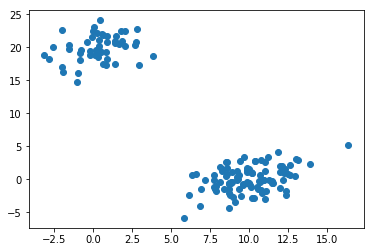

In [4]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

#### Perform the Hierarchical Clustering
Now that we have some very simple sample data, let's do the actual clustering on it:

In [5]:
# generate the linkage matrix
Z = linkage(X, 'ward')

Done. That was pretty simple, wasn't it?

Well, sure it was, this is python ;), but what does 'ward' mean there and how does this actually work?

As it's explained in the scipy documents, 'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 'ward' causes linkage() to use the Ward variance minimization algorithm.

Although it's a good default choice, but it never hurts to play around with some other common linkage methods like 'single', 'complete', 'average', ... and the different distance metrics like 'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'... if you have the feeling that your data should not just be clustered to minimize the overall intra cluster variance in euclidean space.

As you can see there's a lot of choice here and while python and scipy make it very easy to do the clustering, it's you who has to understand and make these choices. 

Another important concept is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9800148387574268

No matter what method and metric you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples as singleton clusters) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [7]:
Z[0]

array([52.     , 53.     ,  0.04151,  2.     ])

We can see that each row of the resulting array has the format [idx1, idx2, dist, sample_count].

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 52 and 53, as they only had a distance of 0.04151. This created a cluster with a total of 2 samples.

In [ ]:
Z[1]

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 14 and 79, which had a distance of 0.04914. This again formed another cluster with a total of 2 samples.

The indices of the clusters until now correspond to our samples. Remember that we had a total of 150 samples, so indices 0 to 149. Let's have a look at the first 20 iterations:

In [ ]:
Z[:20]

We can observe that until iteration 13 the algorithm only directly merged original samples. We can also observe the monotonic increase of the distance.

In iteration 13 the algorithm decided to merge cluster indices 62 with 152. If you paid attention the 152 should astonish you as we only have original sample indices 0 to 149 for our 150 samples. All indices idx >= len(X) actually refer to the cluster formed in Z[idx - len(X)].

This means that while idx 149 corresponds to X[149] that idx 150 corresponds to the cluster formed in Z[0], idx 151 to Z[1], 152 to Z[2], ...

Hence, the merge iteration 13 merged sample 62 to our samples 33 and 68 that were previously merged in iteration 2 (152 - 2).

Let's check out the points coordinates to see if this makes sense:

In [ ]:
X[[33, 68, 62]]

Seems pretty close, but let's plot the points again and highlight them:

In [ ]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

We can see that the 3 red dots are pretty close to each other, which is a good thing.

The same happened in iteration 14 where the alrogithm merged indices 41 to 15 and 69:

In [ ]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
idxs = [15, 69, 41]
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()

Showing that the 3 yellow dots are also quite close.

And so on...

We'll later come back to visualizing this, but now let's have a look at what's called a dendrogram of this hierarchical clustering first:

## Plotting a Dendrogram
A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

(right click and "View Image" to see full resolution)

If this is the first time you see a dendrogram, it's probably quite confusing, so let's take this apart...

On the x axis you see labels. If you don't specify anything else they are the indices of your samples in X.
On the y axis you see the distances (of the 'ward' method in our case).
Starting from each label at the bottom, you can see a vertical line up to a horizontal line. The height of that horizontal line tells you about the distance at which this label was merged into another label or cluster. You can find that other cluster by following the other vertical line down again. If you don't encounter another horizontal line, it was just merged with the other label you reach, otherwise it was merged into another cluster that was formed earlier.

##### Summarizing:

horizontal lines are cluster merges
vertical lines tell you which clusters/labels were part of merge forming that new cluster
heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
You can also see that from distances > 25 up there's a huge jump of the distance to the final merge at a distance of approx. 180. Let's have a look at the distances of the last 4 merges:

In [ ]:
Z[-4:,2]

Such distance jumps / gaps in the dendrogram are pretty interesting for us. They indicate that something is merged here, that maybe just shouldn't be merged. In other words: maybe the things that were merged here really don't belong to the same cluster, telling us that maybe there's just 2 clusters here.

Looking at indices in the above dendrogram also shows us that the green cluster only has indices >= 100, while the red one only has such < 100. This is a good thing as it shows that the algorithm re-discovered the two classes in our toy example.

In case you're wondering about where the colors come from, you might want to have a look at the color_threshold argument of dendrogram(), which as not specified automagically picked a distance cut-off value of 70 % of the final merge and then colored the first clusters below that in individual colors.

## Dendrogram Truncation
As you might have noticed, the above is pretty big for 150 samples already and you probably have way more in real scenarios, so let's spend a few seconds on highlighting some other features of the dendrogram() function:

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

The above shows a truncated dendrogram, which only shows the last p=12 out of our 149 merges.

First thing you should notice are that most labels are missing. This is because except for X[40] all other samples were already merged into clusters before the last 12 merges.

The parameter show_contracted allows us to draw black dots at the heights of those previous cluster merges, so we can still spot gaps even if we don't want to clutter the whole visualization. In our example we can see that the dots are all at pretty small distances when compared to the huge last merge at a distance of 180, telling us that we probably didn't miss much there.

As it's kind of hard to keep track of the cluster sizes just by the dots, dendrogram() will by default also print the cluster sizes in brackets () if a cluster was truncated:

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

We can now see that the right most cluster already consisted of 33 samples before the last 12 merges.

#### Eye Candy (prettier dendogram)
Even though this already makes for quite a nice visualization, we can add more information like annotating the distances inside the dendrogram by using some of the useful return values dendrogram():

In [ ]:
def fancyDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
fancyDendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

#### Selecting a Distance Cut-Off; Determining the Number of Clusters
As explained above already, a huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. If you have the chance to do this manually, I'd always opt for that, as it allows you to gain some insights into your data and to perform some sanity checks on the edge cases. In our case it is probably safe to say that our cut-off is 50, as the jump is pretty obvious:

In [ ]:
# set cut-off to 50
maxDistance = 50  

Let's visualize this in the dendrogram as a cut-off line:

In [ ]:
fancyDendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=maxDistance,  # plot a horizontal cut-off line
)
plt.show()

As we can see, we ("surprisingly") have two clusters at this cut-off.

In general for a chosen cut-off value max_d you can always simply count the number of intersections with vertical lines of the dendrogram to get the number of formed clusters. Say we choose a cut-off of maxDistance = 16, we'd get 4 final clusters:

In [ ]:
fancyDendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
)
plt.show()

##### Automated Cut-Off Selection (or why you shouldn't rely on this)
Now while this manual selection of a cut-off value offers a lot of benefits when it comes to checking for a meaningful clustering and cut-off, there are cases in which you want to automate this.

The problem again is that there is no golden method to pick the number of clusters for all cases (which is why you should understand your data and use investigative & backtesting manual methods, if possible). Wikipedia lists a couple of common methods. Reading this, you should realize how different the approaches and how vague their descriptions are.


###### Inconsistency Method


One of the default for the fcluster() function in scipy is the  "inconsistency" method.

The concept behind the inconsistency method is understanding "what makes a distance jump a jump?". It answers this by comparing each cluster merge's height h to the average avg and normalizing it by the standard deviation std formed over the depth previous levels:

inconsistency= (h−avg) / std

The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5

In [ ]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

Now you might be tempted to say "yay, let's just pick 5" as a limit in the inconsistencies, but look at what happens if we set depth to 3 instead:

In [ ]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

Ooops! This should make you realize that the inconsistency values heavily depend on the depth of the tree you calculate the averages over.

Another problem in its calculation is that the previous d levels' heights aren't normally distributed, but expected to increase, so you can't really just treat the current level as an "outlier" of a normal distribution, as it's expected to be bigger.

###### Elbow Method
This method tries to find the clustering step where the acceleration of distance growth is the biggest (the "strongest elbow" of the blue line graph below, which is the highest value of the green graph below):

In [ ]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

In [ ]:
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

In [ ]:
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

While this works nicely in our simplistic example (the green line takes its maximum for k=2), it's pretty flawed as well.

One issue of this method has to do with the way an "elbow" is defined: you need at least a right and a left point, which implies that this method will never be able to tell you that all your data is in one single cluster only.

Another problem with this variant lies in the np.diff(Z[:, 2], 2) though. The order of the distances in Z[:, 2] isn't properly reflecting the order of merges within one branch of the tree. In other words: there is no guarantee that the distance of Z[i] is contained in the branch of Z[i+1]. By simply computing the np.diff(Z[:, 2], 2) we assume that this doesn't matter and just compare distance jumps from different branches of our merge tree.

If you still don't want to believe this, let's just construct another simplistic example but this time with very different variances in the different clusters:

In [ ]:
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])
X2 = np.concatenate((X, c, d, e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

As you can see we have 5 clusters now, but they have increasing variances... let's have a look at the dendrogram again and how you can use it to spot the problem:

In [ ]:
Z2 = linkage(X2, 'ward')
plt.figure(figsize=(10,10))

In [ ]:
fancyDendrogram(
    Z2,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=40,
    max_d=170,
)
plt.show()

When looking at a dendrogram like this and trying to put a cut-off line somewhere, you should notice the very different distributions of merge distances below that cut-off line. Compare the distribution in the cyan cluster to the red, green or even two blue clusters that have even been truncated away. In the cyan cluster below the cut-off we don't really have any discontinuity of merge distances up to very close to the cut-off line. The two blue clusters on the other hand are each merged below a distance of 25, and have a gap of > 155 to our cut-off line.

The variant of the "elbow" method will incorrectly see the jump from 167 to 180 as minimal and tell us we have 4 clusters:



In [ ]:
last = Z2[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

In [ ]:
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

The same happens with the inconsistency metric:

In [ ]:
print(inconsistent(Z2, 5)[-10:])

I hope you can now understand why i'm warning against blindly using any of those methods on a dataset you know nothing about. They can give you some indication, but you should always go back in and check if the results make sense, for example with a dendrogram which is a great tool for that (especially if you have higher dimensional data that you can't simply visualize anymore).

#### Retrieve the Clusters
Now, let's finally have a look at how to retrieve the clusters, for different ways of determining k. We can use the fcluster function.

##### Knowing max_d:
Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

##### Knowing k:
Another way starting from the dendrogram is to say "i can see i have k=2" clusters. You can then use:

In [ ]:
k=2
fcluster(Z, k, criterion='maxclust')

##### Using the Inconsistency Method (default):
If you're really sure you want to use the inconsistency method to determine the number of clusters in your dataset, you can use the default criterion of fcluster() and hope you picked the correct values:

In [ ]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 8, depth=10)

#### Visualizing Your Clusters
If you're lucky enough and your data is very low dimensional, you can actually visualize the resulting clusters very easily:

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Further Reading:
The scipy hierarchical clustering module: http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
The scipy distance computation docs: http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
The scipy hierarchical clustering module docs often refer to the MATLAB docs saying that a certain function is similar to the MATLAB one. Here's their hierarchical clustering tutorial: http://mathworks.com/help/stats/hierarchical-clustering.html

### Clustering using Scikit (k-means)

#### Automotive Dataset

We will be using the auto_mpg data. Dataset contains information about the MPG, acceleration, weight for each car.  However, we don't have logical groupings for these cars.  We can construct these manually using our domain knowledge (e.g. we could put all of the high mpg cars together and all of the low mpg cars together), but we want a more automatic way of grouping these vehicles that can take into account more features.


In [8]:
# Imports
from sklearn.cluster import KMeans # K means model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from bokeh.sampledata.autompg import autompg as df

In [9]:
# Read in data
data = pd.read_table('auto_mpg.txt', sep='|') # All values range from 0 to 1
data.drop('car_name', axis=1, inplace=True) # Drop labels from dataframe
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1




Let's see how we can implement a k-means clustering algorithm?
scikit-learn KMeans documentation for reference:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [10]:
# Standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
# Set random seed for reproducibility 
np.random.seed(0)

In [12]:
# Run KMeans
est = KMeans(n_clusters=2, init='random') # Instatiate estimator
est.fit(data_scaled) # Fit your data
y_kmeans = est.predict(data_scaled) # Make cluster "predictions"

In [13]:
# Inspect the data by looking at the means for each cluster
data.groupby(y_kmeans).mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,28.720536,4.15625,115.162946,80.566964,2367.433036,16.443750,77.187500,1.995536
1,16.413095,7.22619,300.077381,136.339286,3791.119048,14.338095,74.369048,1.017857


In [14]:
# This can be compared to the overall means for each variable
data.mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
model_year        75.979592
origin             1.576531
dtype: float64

In [15]:
# We can get the coordinates for the center of each cluster
centers = est.cluster_centers_
centers

array([[ 0.67666, -0.7723 , -0.75829, -0.62178, -0.71925,  0.32752,
         0.32832,  0.52083],
       [-0.90222,  1.02973,  1.01105,  0.82904,  0.959  , -0.43669,
        -0.43776, -0.69444]])

##### VISUALIZING THE CLUSTERS


In [ ]:
# We can create a nice plot to visualize this upon two of the dimensions
colors = np.array(['red', 'green', 'blue', 'yellow', 'orange'])

In [ ]:
plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 5], c=colors[y_kmeans], s=50)
plt.xlabel('MPG')
plt.ylabel('Acceleration')
plt.scatter(centers[:, 0], centers[:, 5], linewidths=3, marker='+', s=300, c='black')
plt.show()

In [ ]:
# Another important tool to use when doing cluster analysis is 
# to see which parameters are correlated with each other.
# For this purpose we use the scatter plot matrix to see all of
# the different dimensions paired

pd.plotting.scatter_matrix(data, c=colors[y_kmeans], figsize=(15,15), s = 100)
plt.show()

##### DETERMINING THE NUMBER OF CLUSTERS

How do you choose k - the righ number of clusters? There is not  set in stone rule, but we can evaluate 
performance metrics such as the silhouette (clustering) coefficient across values of k.
Note:  You also have to take into account practical limitations of choosing k also.  Ten clusters may give the best value, but it might not make sense in the
context of your data.
scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics


In [ ]:
# Create a bunch of different models
k_rng = range(2,15)
k_est = [KMeans(n_clusters = k).fit(data) for k in k_rng]


In [ ]:
# Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k
from sklearn import metrics
silhouette_score = [metrics.silhouette_score(data, e.labels_, metric='euclidean') for e in k_est]

In [ ]:
# Plot the results
plt.figure()
plt.title('Silhouette coefficient for various values of k')
plt.plot(k_rng, silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
# Run KMeans
est = KMeans(n_clusters=6, init='random') # Instatiate estimator
est.fit(data_scaled) # Fit your data
y_kmeans = est.predict(data_scaled) # Make cluster "predictions"

In [ ]:
# We can get the coordiantes for the center of each cluster
centers = est.cluster_centers_

In [ ]:
centers

In [ ]:
plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 5])#, c=colors[y_kmeans], s=50)
plt.xlabel('MPG')
plt.ylabel('Acceleration')
plt.scatter(centers[:, 0], centers[:, 5], linewidths=8, marker='+', s=300, c='red')
plt.show()

###### Another example

In [ ]:
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans


data = np.array([[0.1,   2.5],
              [1.5,   .4 ],
              [0.3,   1  ],
              [1  ,   .8 ],
              [0.5,   0  ],
              [0  ,   0.5],
              [0.5,   0.5],
              [2.7,   2  ],
              [2.2,   3.1],
              [3  ,   2  ],
              [3.2,   1.3]])
plt.scatter(data[:,0],data[:,1], s = 150, linewidths=5)
plt.show()

In [ ]:
# from sklearn.cluster import KMeans # K means model
classifier = KMeans(n_clusters=6)
classifier.fit(data)

centroids = classifier.cluster_centers_
labels = classifier.labels_

# colorsList = ["green",'red',"cyan", "black", "orange"]

# for i in range(len(data)):
#     plt.plot(data[i][0], data[i][1], colorsList[labels[i]],markersize=18)
plt.scatter(data[:,0],data[:,1], marker='o')    
plt.scatter(centroids[:,0],centroids[:,1], marker = '+', s = 150, linewidths=15)
plt.show()



                                            
                                             
                                    

###### Titanic Dataset


In [79]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [80]:
df = pd.read_csv('TitanicPassengers.csv')
df.head()

,Passenger Class,Survived,Name,Sex,Age,Siblings and Spouses,Parents and Children,Ticket,Fare,Cabin,Port,Lifeboat,Body,Home_Destination,Midpoint age
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",27.5
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",2.5
2,1,No,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.5
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",32.5
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",27.5


In [81]:
# What to do with Categorical Data, missing data?

df.drop(['Body','Name'],1,inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)

In [83]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Passenger Class         1309 non-null int64
Survived                1309 non-null object
Sex                     1309 non-null object
Age                     1309 non-null float64
Siblings and Spouses    1309 non-null int64
Parents and Children    1309 non-null int64
Ticket                  1309 non-null object
Fare                    1309 non-null float64
Cabin                   1309 non-null object
Port                    1309 non-null object
Lifeboat                1309 non-null object
Home_Destination        1309 non-null object
Midpoint age            1309 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 133.0+ KB


(   Passenger Class Survived     Sex      Age  Siblings and Spouses  \
 0                1      Yes  female  29.0000                     0   
 1                1      Yes    male   0.9167                     1   
 2                1       No  female   2.0000                     1   
 3                1       No    male  30.0000                     1   
 4                1       No  female  25.0000                     1   
 
    Parents and Children  Ticket      Fare    Cabin Port Lifeboat  \
 0                     0   24160  211.3375       B5    S        2   
 1                     2  113781  151.5500  C22 C26    S       11   
 2                     2  113781  151.5500  C22 C26    S        0   
 3                     2  113781  151.5500  C22 C26    S        0   
 4                     2  113781  151.5500  C22 C26    S        0   
 
                   Home_Destination  Midpoint age  
 0                     St Louis, MO          27.5  
 1  Montreal, PQ / Chesterville, ON           2.5  


In [85]:
def handle_categoricalData(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [87]:
df2 = handle_categoricalData(df)
df2.head(5)
                                

,Passenger Class,Survived,Sex,Age,Siblings and Spouses,Parents and Children,Ticket,Fare,Cabin,Port,Lifeboat,Home_Destination,Midpoint age
0,1,0,1,29.0000,0,0,763,211.3375,29,2,14,111,27.5
1,1,0,0,0.9167,1,2,761,151.5500,73,2,25,336,2.5
2,1,1,1,2.0000,1,2,761,151.5500,73,2,0,336,2.5
3,1,1,0,30.0000,1,2,761,151.5500,73,2,0,336,32.5
4,1,1,1,25.0000,1,2,761,151.5500,73,2,0,336,27.5


In [ ]:
# df3 = df2
df3.drop(['Lifeboat'],1)
df3.drop(['Sex'],1)

In [ ]:
X = np.array(df3.drop(['Survived'],1).astype(float))
X[0:5]

In [ ]:
X = preprocessing.scale(X)
X[0:5]

In [ ]:
# df2.Survived
y = np.array(df3.Survived)

In [ ]:
clf = KMeans(n_clusters=2)
clf.fit(X)

In [ ]:
# Let's check how good is our prediction
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))

##### Under the hood - kMeans clustering


In [ ]:
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans

In [ ]:
data = np.array([[0.1,   2.5],
              [0.5,   .4 ],
              [0.3,   1  ],
              [1  ,   .8 ],
              [0.5,   0  ],
              [0  ,   0.5],
              [0.5,   0.5],
              [2.7,   2  ],
              [2.2,   3.1],
              [3  ,   2  ],
              [3.2,   0.3]])
plt.scatter(data[:,0],data[:,1], s = 150, linewidths=5)
plt.show()

In [ ]:
colorsList = ["green",'red',"cyan", "black", "orange"]

In [ ]:
class K_Means:
    def __init__(self, k = 2, tol = 0.0001, max_iter = 300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i]=[]
                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                # pass
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    # print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                    
            if optimized:
                break
                
                
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        # print(classification)
        return classification

In [ ]:
clf = K_Means()
clf.fit(data)

In [ ]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],marker = 'o', color = 'k', s = 150, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color = colorsList[classification], s = 150, linewidths = 5)

plt.show()

In [ ]:
newData = np.array([[1, 3],
                   [1.8,1.9],
                   [0.5,0.3],
                   [2.01,2.4],
                   [2,2.5]
                   ,])

In [ ]:
for newValues in newData:
    classification = clf.predict(newValues)
    plt.scatter(newValues[0], newValues[1], marker = '*', color = colorsList[classification], s =150, linewidths = 5)
    
plt.show()

In [ ]:
# How does it do for the Titanic data ?

clf = K_Means()
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1
        
print(correct/len(X))

##### Hierarchical Clustering - Using sklearn Mean Shift

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')

In [ ]:
centers = [[1,1,1], [5, 5,5],[3, 10, 10]]
X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

In [ ]:
n_clusters = len(np.unique(labels))
print("Number of estimated Clusters:", n_clusters)

In [ ]:
colors = 10*['r', 'g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2], c = colors[labels[i]], marker = 'o')
    
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker = 'x', color='k', s= 150, linewidths = 5, zorder = 10)
           
plt.show()

#### Under the Hood - Self implementation

In [ ]:
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans


data = np.array([[0.1,   2.5],
              [0.5,   .4 ],
              [0.3,   1  ],
              [1  ,   .8 ],
              [0.5,   0  ],
              [0  ,   0.5],
              [0.5,   0.5],
              [2.7,   2  ],
              [2.2,   3.1],
              [3  ,   2  ],
              [3.2,   0.3]])
plt.scatter(data[:,0],data[:,1], s = 150, linewidths=5)
plt.show()
colorsList = 10*["green",'red',"cyan", "black", "orange"]


In [ ]:
class Mean_Shift:
    def __init__(self, radius=2):
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        
        for i in range(len(data)):
            centroids[i]=data[i]
            
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = [];
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i],prev_centroids[i]):
                    optimized = False
                    
                if not optimized:
                    break
                    
            if optimized:
                break
                
        self.centroids = centroids
        
    def predict(self, data):
        pass
    

In [ ]:
clf = Mean_Shift()
clf.fit(data)

In [ ]:
centroids = clf.centroids
plt.scatter(data[:,0],data[:,1], s = 150, linewidths=5)

In [ ]:
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)
    

In [ ]:
class Mean_Shift_Dynamic:
    def __init__(self, radius=None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step =radius_norm_step
        
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm/self.radius_norm_step
            
        
        centroids = {}
        
        for i in range(len(data)):
            centroids[i]=data[i]
            
        weights = [i for i in range(self.radius_norm_step)][::-1]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = [];
                centroid = centroids[i]
                
                
                
                
                for featureset in data:
                    
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                        
                    to_add = (weights[weight_index]**2)*[featureset]
                    # to_add = (weights[weight_index])*[featureset] # faster, not as reliable
                    
                    in_bandwidth += to_add
                    
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break # eliminate duplicates
                        
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                    
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i],prev_centroids[i]):
                    optimized = False
                    
                if not optimized:
                    break
                    
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
            
        
    def predict(self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    

In [ ]:
clf = Mean_Shift_Dynamic()
clf.fit(data)

In [ ]:
centroids = clf.centroids
plt.scatter(data[:,0],data[:,1], s = 150, linewidths=5)

In [ ]:
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)


In [ ]:
plt.show()

In [ ]:
clf = Mean_Shift_Dynamic()
clf.fit(data)

In [ ]:
centroids = clf.centroids

for classification in clf.classifications:
    color = colorsList[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker= 'x', color = colorsList[classification], s = 150, linewidths = 5)
        

In [ ]:
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)

plt.show()

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

# X, y = make_blobs(n_samples =150, centers = 3, n_features = 2)


In [ ]:
import random

randomCenters= random.randrange(2,8)
X, y = make_blobs(n_samples =50, centers = randomCenters, n_features = 2)

clf = Mean_Shift_Dynamic()
clf.fit(X)
centroids = clf.centroids

for classification in clf.classifications:
    color = colorsList[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker= 'x', color = colorsList[classification], s = 150, linewidths = 15)
        
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)


plt.show()



# Decision Trees

*Adapted from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

## Motivation

Why are we learning about decision trees?

- They're useful for both regression and classification problems.
- They're popular (for a variety of reasons).
- They're the basis for more sophisticated modeling approaches.
- They demonstrate a different way of "thinking" than the models we have studied so far.

## Regression trees

Let's look at a simple example to get started.

Our goal is to **predict a baseball player's Salary** based on **Years** (number of years playing in the major leagues) and **Hits** (number of hits he made in the previous year). Here is the training data, represented visually (low salary is blue/green, high salary is red/yellow):

![Salary data](salary_color.png)

**How might you "stratify" or "segment" the feature space into regions, based on salary?** Here are the rules:

- You can only use straight lines, drawn one at a time.
- Your line must either be vertical or horizontal.
- Your line stops when it hits an existing line.

Intuitively, you want to **maximize** the similarity (or "homogeneity") within a given region, and **minimize** the similarity between different regions.

*Let's take a minute and do this...*

Below is a regression tree that has been fit to the data by a computer. (We will talk later about how the fitting algorithm actually works.) Note that  Salary is measured in thousands and has been log-transformed.

![Salary tree](salary_tree.png)

**How do we make Salary predictions (for out-of-sample data) using a decision tree?**

- Start at the top, and examine the first "splitting rule" (Years < 4.5).
- If the rule is **True** for a given player, follow the **left branch**. If the rule is **False**, follow the **right branch**.
- Continue until reaching the bottom. The predicted Salary is the number in that particular "bucket".
- **Note:** Years and Hits are both integers, but the convention is to label these rules using the midpoint between adjacent values.

Example predictions:

- Years=3, then predict 5.11 ($\$1000 \times e^{5.11} \approx \$166000$)
- Years=5 and Hits=100, then predict 6.00 ($\$1000 \times e^{6.00} \approx \$403000$)
- Years=8 and Hits=120, then predict 6.74 ($\$1000 \times e^{6.74} \approx \$846000$)

**How did we come up with the numbers at the bottom of the tree?** Each number is just the **mean Salary in the training data** of players who fit that criteria.

Here's the same diagram as before, split into the three regions:

![Salary regions](salary_regions.png)

This diagram is essentially a combination of the two previous diagrams. In $R_1$, the mean log Salary was 5.11. In $R_2$, the mean log Salary was 6.00. In $R_3$, the mean log Salary was 6.74. Thus, those values are used to predict out-of-sample data.

Let's introduce some terminology:

![Salary tree annotated](salary_tree_annotated.png)

**How might you interpret the "meaning" of this tree?**

- Years is the most important factor determining Salary, with a lower number of Years corresponding to a lower Salary.
- For a player with a lower number of Years, Hits is not an important factor determining Salary.
- For a player with a higher number of Years, Hits is an important factor determining Salary, with a greater number of Hits corresponding to a higher Salary.

What we have seen so far hints at the advantages and disadvantages of decision trees:

**Advantages:**

- Highly interpretable
- Can be displayed graphically
- Prediction is fast

**Disadvantages:**

- Predictive accuracy is not as high as some supervised learning methods
- Can easily overfit the training data

## Building a regression tree by hand

How do you build a decision tree? You're going to find out by building one in pairs!

Your training data is a tiny dataset of [used vehicle sale prices](vehicles_train.csv). Your goal is to predict **price** for testing data. Here are your instructions:

- Read the data into Pandas.
- Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
- Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)
- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)
- You are allowed to split on the same variable multiple times!
- Draw your tree, making sure to label your leaves with the mean Price for the observations in that "bucket".
- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the **left branch** if the rule is **true**, and follow the **right branch** if the rule is **false**.)

## How does a computer build a regression tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criterion is met, such as **maximum tree depth** or **minimum number of samples in a leaf**.

Below is the regression tree for player salaries grown much deeper, and a comparison of the training, test, and cross-validation errors for trees with different numbers of leaves:

![Salary unpruned](salary_unpruned.png)

As you can see, the **training error** continues to go down as the tree size increases, but the lowest **cross-validation error** occurs for a tree with 3 leaves.

## Building a regression tree in scikit-learn

In [114]:
# read the training data into pandas and print it out
import pandas as pd
train = pd.read_csv('vehicles_train.csv')
train

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [115]:
# encode car as 0 and truck as 1
train['type'] = train.type.map({'car':0, 'truck':1})

In [116]:
# create a list of the feature columns (every column except for the 0th column)
feature_cols = train.columns[1:]

In [117]:
# define X (features) and y (response)
X = train[feature_cols]
y = train.price

In [118]:
# import the relevant class, and instantiate the model (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)

In [119]:
# print the model object to see the default arguments
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [121]:
# use 3-fold cross-validation to estimate the RMSE for this model
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4707.250588484563

# Tuning a regression tree

Let's see if we can reduce the RMSE by tuning the **max_depth** parameter. One way to search for an optimal value would be to try different values, one by one:

In [96]:
# try max_depth=1
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

NameError: name 'DecisionTreeRegressor' is not defined

Or, we could write a loop to try a range of values:

In [ ]:
# define a range of values
max_depth_range = range(1, 11)

# create an empty list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use cross-validation with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
# print the results
RMSE_scores

In [ ]:
# plot the max_depth (x-axis) versus the RMSE (y-axis)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(max_depth_range, RMSE_scores)

In [ ]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

In [ ]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

## Creating a tree diagram


![Tree for vehicle data](tree_vehicles.png)

How do we read this decision tree?

**Internal nodes:**

- "samples" is the number of observations in that node before splitting
- "mse" is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- first line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- "samples" is the number of observations in that node
- "value" is the mean response value in that node
- "mse" is the mean squared error calculated by comparing the actual response values in that node against "value"

## Predicting on test data

How good is scikit-learn's regression tree at predicting the price for test observations?

In [106]:
# read the test data
test = pd.read_csv('vehicles_test.csv')

# encode car as 0 and truck as 1
test['type'] = test.type.map({'car':0, 'truck':1})

# print the data
test

,price,year,miles,doors,type
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [107]:
# define X and y
X_test = test[feature_cols]
y_test = test.price

In [ ]:
# make predictions on test data
y_pred = treereg.predict(X_test)
y_pred

In [105]:
# calculate RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# calculate RMSE for your own tree!
y_test = [3000, 6000, 12000]
y_pred = [3057, 3057, 16333]
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

## Classification trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize Gini index (discussed below)|

Here's an **example of a classification tree**, which predicts whether Barack Obama or Hillary Clinton would win the Democratic primary in a particular county in 2008:

![Obama-Clinton decision tree](obama_clinton_tree.jpg)

**A few questions:**

- What is the response variable?
- What are the features?
- What is the most predictive feature?
- How would we calculate the total number of counties?

## Splitting criteria for classification trees

Here are common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region
- **cross-entropy:** numerically similar to Gini index

The goal when splitting is to increase the "node purity", and it turns out that the **Gini index and cross-entropy** are better measures of purity than classification error rate. The Gini index is faster to compute than cross-entropy, so it is generally preferred (and is used by scikit-learn by default).

## Example calculations of Gini index

Let's say that we are predicting survival on the Titanic. At a particular node, there are **25 individuals**, of whom 10 survived and 15 died. Here's how we calculate the Gini index before making a split:

$$1 - \left(\frac {Survived} {Total}\right)^2 - \left(\frac {Died} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

The **maximum value** of the Gini index is 0.5, and occurs when the classes are perfectly balanced in a node. The **minimum value** of the Gini index is 0, and occurs when there is only one class represented in a node. Thus, a node with a lower Gini index is said to be more "pure".

**When deciding between splits**, the decision tree algorithm chooses the split that maximizes the resulting node purity. Let's pretend that gender was the split being considered, and the resulting nodes are as follows:

- **Males:** 2 survived, 13 died
- **Females:** 8 survived, 2 died

To evaluate this split, we calculate the **weighted average of the Gini indices of the resulting nodes:**

$$\text{Males: } 1 - \left(\frac {2} {15}\right)^2 - \left(\frac {13} {15}\right)^2 = 0.23$$
$$\text{Females: } 1 - \left(\frac {8} {10}\right)^2 - \left(\frac {2} {10}\right)^2 = 0.32$$
$$\text{Weighted Average: } 0.23 \left(\frac {15} {25}\right) + 0.32 \left(\frac {10} {25}\right) = 0.27$$

Thus, the decrease in Gini index (and gain in purity) from splitting on gender is **0.21**. The decision tree algorithm will choose this split if no other splits result in a larger gain in purity.

## Building a classification tree in scikit-learn

We'll build a classification tree using the [Titanic data](https://www.kaggle.com/c/titanic-gettingStarted/data) provided by Kaggle.

In [88]:
# read in the data
titanic = pd.read_csv('titanic_train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's choose our response variable and a few features, and review **how to handle categorical features**:

- **Survived:** This is our response variable, and is already encoded as 0=died and 1=survived.
- **Pclass:** These are the passenger class categories (1=first class, 2=second class, 3=third class). They are logically ordered, so we'll leave them as-is. (If the tree splits on this feature, the splits will occur at 1.5 or 2.5.)
- **Sex:** This is a binary category, so we should encode it as 0=female and 1=male. (If the tree splits on this feature, the split will occur at 0.5.)
- **Age:** This is a numeric feature, but we need to fill in the missing values.
- **Embarked:** This is the port they embarked from. There are three unordered categories, so we should create dummy variables and drop one level as usual.

In [89]:
# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

# create three dummy variables, drop the first dummy variable, and store the two remaining columns as a DataFrame
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [90]:
# create a list of the feature columns
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

In [91]:
# define X (features) and y (response)
X = titanic[feature_cols]
y = titanic.Survived

In [92]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

![Tree for Titanic data](tree_titanic.png)



Notice the split in the bottom right. The **same class** is predicted in both of its leaves! Why did this split occur?

Although that split didn't affect the **classification error rate**, it did increase the **node purity**. Node purity is important because we're interested in the class proportions among the observations in each region.

In [ ]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

## Wrapping up decision trees

Here are some advantages and disadvantages of decision trees that we haven't yet talked about:

**Advantages:**

- Can be specified as a series of rules, and are thought to more closely approximate human decision-making than other models
- Non-parametric (will do better than linear models if relationship between features and response is highly non-linear)

**Disadvantages:**

- Small variations in the data can result in a completely different tree (high variance)
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Can create biased trees if the classes are highly imbalanced

Note that there is not just one decision tree algorithm; instead, there are many variations. A few common decision tree algorithms that are often referred to by name are C4.5, C5.0, and CART. (More details are available in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).) scikit-learn uses an "optimized version" of CART.

## Resources

- scikit-learn documentation: [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

# Introduction to Ensembling

*Adapted from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

Let's pretend that instead of building a single model to solve a classification problem, you created **five independent models**, and each model was correct 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct?

Let's simulate it to find out!

In [ ]:
import numpy as np

In [ ]:
# set a seed for reproducibility
np.random.seed(1234)

In [ ]:
# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

In [ ]:
# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

In [ ]:
# add the predictions together
sum_of_preds = preds1 + preds2 + preds3 + preds4 + preds5

In [ ]:
# ensemble predicts 1 (the "correct response") if at least 3 models predict 1
ensemble_preds = np.where(sum_of_preds >=3 , 1, 0)

In [ ]:
# print the ensemble's first 20 predictions
print(ensemble_preds[:20])

In [ ]:
# print the first 20 predictions from each model
print(preds1[:20])
print(preds2[:20])
print(preds3[:20])
print(preds4[:20])
print(preds5[:20])

In [ ]:
# how accurate was the ensemble?
ensemble_preds.mean()

Amazing, right?

**Ensemble learning (or "ensembling")** is simply the process of combining several models to solve a prediction problem, with the goal of producing a combined model that is more accurate than any individual model. For **classification** problems, the combination is often done by majority vote. For **regression** problems, the combination is often done by taking an average of the predictions.

For ensembling to work well, the individual models must meet two conditions:

- Models should be **accurate** (they must outperform random guessing)
- Models should be **independent** (their predictions are not correlated with one another)

The idea, then, is that if you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

It turns out that as you add more models to the voting process, the probability of error decreases. This is known as [Condorcet's Jury Theorem](http://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem), which was developed by a French political scientist in the 18th century.

Anyway, we'll see examples of ensembling below.

## Bootstrapping

**Some preliminary terminology:** In statistics, "bootstrapping" refers to the process of using "bootstrap samples" to quantify the uncertainty of a model. Bootstrap samples are simply random samples with replacement:

In [ ]:
# set a seed for reproducibility
np.random.seed(1)

# create an array of 0 to 9, then sample 10 times with replacement
np.random.choice(a=10, size=10, replace=True)

## Bagging

On their own, decision trees are not competitive with the best supervised learning methods in terms of **predictive accuracy**. However, they can be used as the basis for more sophisticated methods that have much higher accuracy!

One of the main issues with decision trees is **high variance**, meaning that different splits in the training data can lead to very different trees. **"Bootstrap aggregation" (aka "bagging")** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees.

What is the bagging process (in general)?

- Take repeated bootstrap samples (random samples with replacement) from the training data set
- Train our method on each bootstrapped training set and make predictions
- Average the predictions

This increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with the test set approach (for estimating out-of-sample error) by splitting many times an averaging the results.

## Applying bagging to decision trees

So how exactly can bagging be used with decision trees? Here's how it applies to **regression trees**:

- Grow B regression trees using B bootstrapped training sets
- Grow each tree deep so that each one has low bias
- Every tree makes a numeric prediction, and the predictions are averaged (to reduce the variance)

It is applied in a similar fashion to **classification trees**, except that during the prediction stage, the overall prediction is based upon a majority vote of the trees.

**What value should be used for B?** Simply use a large enough value that the error seems to have stabilized. (Choosing a value of B that is "too large" will generally not lead to overfitting.)

## Manually implementing bagged decision trees

In [ ]:
import pandas as pd

In [ ]:
# read in vehicle data
vehicles = pd.read_csv('used_vehicles.csv')

In [ ]:
# convert car to 0 and truck to 1
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

# print out data
vehicles

In [ ]:
# calculate the number of rows in vehicles
n_rows = vehicles.shape[0]

In [ ]:
# set a seed for reproducibility
np.random.seed(123)

In [ ]:
# create three bootstrap samples (will be used to select rows from the DataFrame)
sample1 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample2 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample3 = np.random.choice(a=n_rows, size=n_rows, replace=True)

In [ ]:
# print samples
print(sample1)
print(sample2)
print(sample3)

In [ ]:
# use sample1 to select rows from DataFrame
print(vehicles.iloc[sample1, :])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# grow one regression tree with each bootstrapped training set
treereg1 = DecisionTreeRegressor(random_state=123)
treereg1.fit(vehicles.iloc[sample1, 1:], vehicles.iloc[sample1, 0])

treereg2 = DecisionTreeRegressor(random_state=123)
treereg2.fit(vehicles.iloc[sample2, 1:], vehicles.iloc[sample2, 0])

treereg3 = DecisionTreeRegressor(random_state=123)
treereg3.fit(vehicles.iloc[sample3, 1:], vehicles.iloc[sample3, 0])

In [ ]:
# read in out-of-sample data
oos = pd.read_csv('used_vehicles_oos.csv')

# convert car to 0 and truck to 1
oos['type'] = oos.type.map({'car':0, 'truck':1})

# print data
oos

In [ ]:
# select feature columns (every column except for the 0th column)
feature_cols = vehicles.columns[1:]

# make predictions on out-of-sample data
preds1 = treereg1.predict(oos[feature_cols])
preds2 = treereg2.predict(oos[feature_cols])
preds3 = treereg3.predict(oos[feature_cols])

# print predictions
print(preds1)
print(preds2)
print(preds3)

In [ ]:
# average predictions and compare to actual values
print((preds1 + preds2 + preds3)/3)
print(oos.price.values)

## Estimating out-of-sample error

Bagged models have a very nice property: **out-of-sample error can be estimated without using the test set approach or cross-validation!**

Here's how the out-of-sample estimation process works with bagged trees:

- On average, each bagged tree uses about two-thirds of the observations. **For each tree, the remaining observations are called "out-of-bag" observations.**
- For the first observation in the training data, predict its response using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a majority vote (for classification).
- Repeat this process for every observation in the training data.
- Compare all predictions to the actual responses in order to compute a mean squared error or classification error. This is known as the **out-of-bag error**.

**When B is sufficiently large, the out-of-bag error is an accurate estimate of out-of-sample error.**

In [ ]:
# set is a data structure used to identify unique elements
print(set(range(14)))

In [ ]:
# only show the unique elements in sample1
print(set(sample1))

In [ ]:
# use the "set difference" to identify the out-of-bag observations for each tree
print(sorted(set(range(14)) - set(sample1)))
print(sorted(set(range(14)) - set(sample2)))
print(sorted(set(range(14)) - set(sample3)))

Thus, we would predict the response for **observation 4** by using tree 1 (because it is only out-of-bag for tree 1). We would predict the response for **observation 5** by averaging the predictions from trees 1, 2, and 3 (since it is out-of-bag for all three trees). We would repeat this process for all observations, and then calculate the MSE using those predictions.

## Estimating variable importance

Although bagging **increases predictive accuracy**, it **decreases model interpretability** because it's no longer possible to visualize the tree to understand the importance of each variable.

However, we can still obtain an overall summary of "variable importance" from bagged models:

- To compute variable importance for bagged regression trees, we can calculate the **total amount that the mean squared error is decreased due to splits over a given predictor, averaged over all trees**.
- A similar process is used for bagged classification trees, except we use the Gini index instead of the mean squared error.

(We'll see an example of this below.)

## Random Forests

Random Forests is a **slight variation of bagged trees** that has even better performance! Here's how it works:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, **each time a split is considered**, a random sample of m predictors is chosen as split candidates from the full set of p predictors. **The split is only allowed to use one of those m predictors.**

Notes:

- A new random sample of predictors is chosen for **every single tree at every single split**.
- For **classification**, m is typically chosen to be the square root of p. For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is one very strong predictor in the data set. When using bagged trees, most of the trees will use that predictor as the top split, resulting in an ensemble of similar trees that are "highly correlated".
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- **By randomly leaving out candidate predictors from each split, Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

In [93]:
# read in the Titanic data
titanic = pd.read_csv('titanicForEnsemble.csv')

# encode sex feature
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})

# fill in missing values for age
titanic.age.fillna(titanic.age.mean(), inplace=True)

# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# print the updated DataFrame
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [94]:
# import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, random_state=1)
rfclf.fit(titanic[feature_cols], titanic.survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

These are the most important tuning parameters for Random Forests:

- **n_estimators:** more estimators (trees) increases performance but decreases speed
- **max_features:** cross-validate to choose an ideal value

In [95]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

,feature,importance
0,pclass,0.159183
1,sex,0.374466
2,age,0.424082
3,embarked_Q,0.012104
4,embarked_S,0.030164


In [104]:
# compute the out-of-bag classification accuracy
rfclf.oob_score_

0.797979797979798

## Wrapping up ensembling

Ensembling is incredibly popular, when the **primary goal is predictive accuracy**. For example, the team that eventually won the $1 million [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_Prize) used an [ensemble of 107 models](http://www2.research.att.com/~volinsky/papers/chance.pdf) early on in the competition.

There was a recent paper in the Journal of Machine Learning Research titled "[Do We Need Hundreds of Classifiers to Solve Real World Classification Problems?](http://jmlr.csail.mit.edu/papers/volume15/delgado14a/delgado14a.pdf)" (**Spoiler alert:** Random Forests did very well.) In the [comments about the paper](https://news.ycombinator.com/item?id=8719723) on Hacker News, Ben Hamner (Kaggle's chief scientist) said the following:

> This is consistent with our experience running hundreds of Kaggle competitions: for most classification problems, some variation on ensembled decision trees (random forests, gradient boosted machines, etc.) performs the best. This is typically in conjunction with clever data processing, feature selection, and internal validation.

> One key exception is where the data is richly and hierarchically structured. Text, speech, and visual data falls under this category. In many cases here, variations of neural networks (deep neural nets/CNN's/RNN's/etc.) provide very dramatic improvements.

But as you can imagine, ensembling may not often be practical in a real-time environment.

**You can also build your own ensembles:** just build a variety of models and average them together! Here are some strategies for building independent models:

- using different models
- choosing different combinations of features
- changing the tuning parameters

Note that there is an entire class of well-known ensembling methods that we did not discuss, namely **boosting**. Instead of building independent models and averaging the predictions, the models are built sequentially on repeatedly modified versions of the data. More information is available in the scikit-learn documentation on Ensemble Methods, namely the sections on [AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost) and [Gradient Tree Boosting](http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

## Resources

- scikit-learn documentation: [Ensemble Methods](http://scikit-learn.org/stable/modules/ensemble.html)
- Quora: [How do random forests work in layman's terms?](http://www.quora.com/How-do-random-forests-work-in-laymans-terms/answer/Edwin-Chen-1)